In [3]:
import serial
import re
import time

ser = serial.Serial('COM6', 115200, timeout=1)
aa = open('D:\桌面\datas_serial.txt', 'w', encoding='utf-8')
ser.write("testing".encode())
try:
    while 1:

        wind = ser.readline()   # 读取
        print(wind)
        st = str(wind)  # 列表转换字符串

        sst = re.findall(r'\d+\.?\d+', st)   # 字符串提取数字

        if sst == []:
            sst = 0
        else:
            print(str(sst[0]), str(sst[1]) )

            aa.write(str(sst[0])+ " " +sst[1] +'\n')


except KeyboardInterrupt:
    ser.close()
    aa.close()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19740\2308056856.py:6: SyntaxWarning: invalid escape sequence '\d'
  aa = open('D:\桌面\datas_serial.txt', 'w', encoding='utf-8')


AttributeError: module 'serial' has no attribute 'Serial'

调试4次Q R 参数，得出QR对滤波效果影响的结论

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = '0.00'
print(float(a))
print(type(a))

0.0
<class 'str'>


In [4]:
n = 0.0045
a = np.zeros(15)
a[0] = 0.007
for i in range(15):
    a[i] = 0.007 + n * i

print(a)

[0.007  0.0115 0.016  0.0205 0.025  0.0295 0.034  0.0385 0.043  0.0475
 0.052  0.0565 0.061  0.0655 0.07  ]


In [2]:
def plot_the_curve(file_name, the_dpi, the_size):
     data = np.genfromtxt(file_name)
     the_len, the_num = data.shape
     t = range(the_len)
     plt.figure(dpi= the_dpi, figsize= the_size)
     for angle_id in range(the_num):
          id_string = "encoder_" + str(angle_id)
          plt.plot(t, data[:,angle_id], linewidth = 0.5, label = id_string)
     plt.legend()

def plot_the_curve_without0(file_name, the_dpi, the_size):
     data = np.genfromtxt(file_name)
     the_len, the_num = data.shape
     t = range(the_len)
     plt.figure(dpi= the_dpi, figsize= the_size)
     for angle_id in range(the_num):
          if(angle_id == 0):
               continue
          id_string = "encoder_" + str(angle_id)
          plt.plot(t, data[:,angle_id], linewidth = 0.5, label = id_string)
     plt.legend()


In [3]:
def plot_the_data(data,the_dpi, the_size):
    the_len, the_num = data.shape
    t = range(the_len)
    plt.figure(dpi= the_dpi, figsize= the_size)
    for angle_id in range(the_num):
        if(angle_id == 0):
            continue
        id_string = "encoder_" + str(angle_id)
        plt.plot(t, data[:,angle_id], linewidth = 0.5, label = id_string)
    plt.legend()

def plot_the_array(data,the_dpi, the_size):
    the_len = len(data)
    t = range(the_len)
    plt.figure(dpi= the_dpi, figsize= the_size)
    plt.plot(t, data, linewidth = 0.5)
    plt.legend()


In [4]:
class KalmanFilter:
    def __init__(self, pre_err, mea_err):
        self.pre_err = pre_err  # Q
        self.mea_err = mea_err  # R
        self.x = 0.0
        self.P = 1
        self._x = 0.0  # last value
        self._P = 0.0
        self.K = 0.0
        self.the_1st = 0

    def update(self, measure):
        if self.the_1st == 0:
            self.x = measure
            self.the_1st = 1
        self._x = self.x
        self._P = self.P + self.pre_err
        self.K = self._P / (self._P + self.mea_err)
        self.x = self._x + self.K * (measure - self._x)
        self.P = (1 - self.K) * self._P
        return self.x

def after_KF(raw_data, Q, R):
    rows, cols = raw_data.shape
    new_data = np.zeros((rows, cols))
    for i in range(cols):
        KF = KalmanFilter(Q, R)
        for j in range(rows):
            
            new_data[j][i] = KF.update(raw_data[j][i])
    return new_data

def after_KF_encoder0(encoder0, Q, R):
    size = len(encoder0)
    new_encoder0 = np.zeros(size)
    new_encoder0[0] = encoder0[0]
    KF = KalmanFilter(Q, R)
    last_angle = 0
    for i in range(size):
        if i > 0:
            last_angle = encoder0[i-1]
            if encoder0[i] - last_angle > 15 or last_angle - encoder0[i] > 15: # detect the step
                KF.x = encoder0[i]
            new_encoder0[i] = KF.update(encoder0[i])
    return new_encoder0


def after_KF2(raw_data, Q, R):
    rows, cols = raw_data.shape
    new_data = np.zeros((rows, cols))
    new_data[0,:] = raw_data[0,:]
    for i in range(cols):
        KF = KalmanFilter(Q, R)
        last_angle = 0
        for j in range(rows):
            if j > 0:
                last_angle = raw_data[j-1][i]
                if last_angle == raw_data[j][i]:
                    new_data[j][i] = new_data[j-1][i]
                else:
                    new_data[j][i] = KF.update(raw_data[j][i])      
    return new_data

    


In [3]:

file_test = '/Users/lilinlin/Desktop/毕设/datas_serial_Q=0.1.txt'
plot_the_curve(file_test, 100, (6,6))

FileNotFoundError: /Users/lilinlin/Desktop/毕设/datas_serial_Q=0.1.txt not found.

In [4]:
def openreadtxt(file_name):
    data = np.genfromtxt(file_name)
    return data
 

data_Q_003 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.03.txt')

print(data_Q_003.shape)

(551, 2)


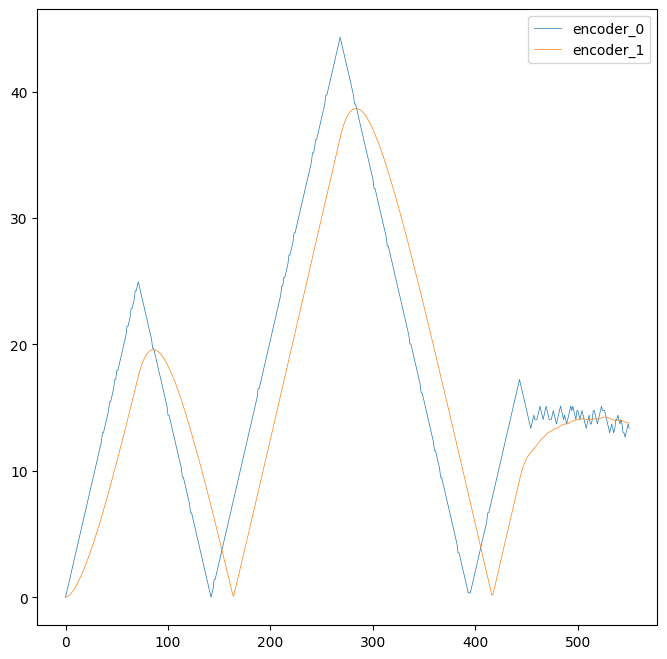

In [5]:
plot_the_curve('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.03.txt',100, (8,8))

Text(0.5, 1.0, 'Q = 0.03')

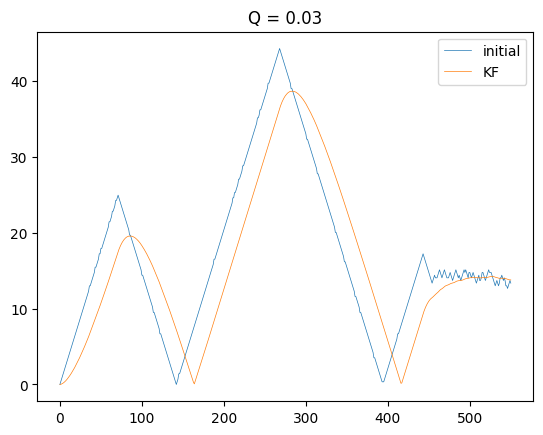

In [6]:
plt.figure(1)
len_1 = len(data_Q_003)
t1 = range(len_1)

data_Q_003_raw = data_Q_003[:,0]
data_Q_003_KF = data_Q_003[:,1]
plt.plot(t1, data_Q_003_raw, linewidth = 0.5,label = "initial" )
plt.plot(t1,data_Q_003_KF,linewidth = 0.5, label ="KF" )
plt.legend()
plt.title("Q = 0.03")

Q = 0.1 ; R= 16

In [7]:
data_Q_01 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.1.txt')

Text(0.5, 1.0, 'Q = 0.1')

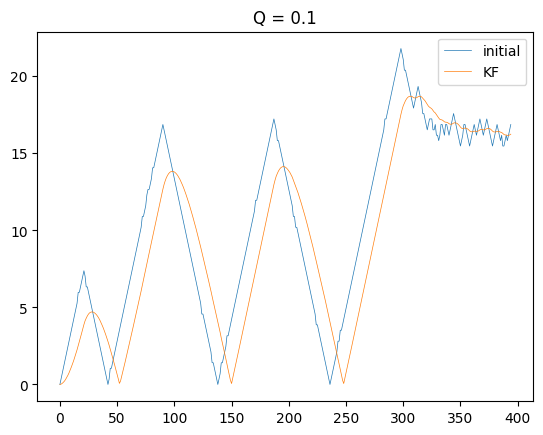

In [8]:
plt.figure(5)
len_5 = len(data_Q_01)
t5 = range(len_5)

data_Q_01_raw = data_Q_01[:,0]
data_Q_01_KF = data_Q_01[:,1]
plt.plot(t5, data_Q_01_raw, linewidth = 0.5,label = "initial" )
plt.plot(t5,data_Q_01_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.1")

Q = 0.3 ;R = 16

In [9]:
data_Q_03 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=0.3.txt')
# print(data_Q_03)

Text(0.5, 1.0, 'Q = 0.3')

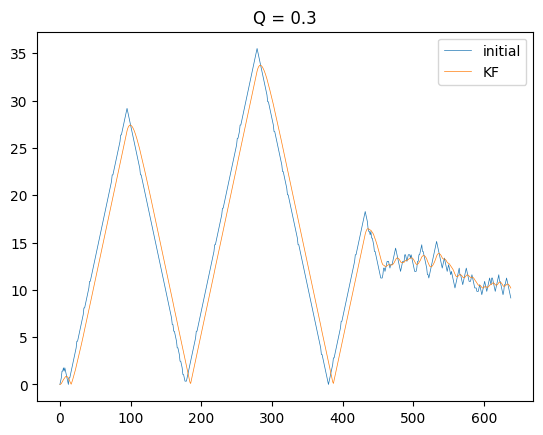

In [10]:
plt.figure(2)
len_2 = len(data_Q_03)
t2 = range(len_2)

data_Q_03_raw = data_Q_03[:,0]
data_Q_03_KF = data_Q_03[:,1]
plt.plot(t2, data_Q_03_raw,linewidth = 0.5,label = "initial")
plt.plot(t2,data_Q_03_KF,linewidth = 0.5, label ="KF")
plt.legend()
plt.title("Q = 0.3")

Q =3 ; R = 16

Text(0.5, 1.0, 'Q = 3')

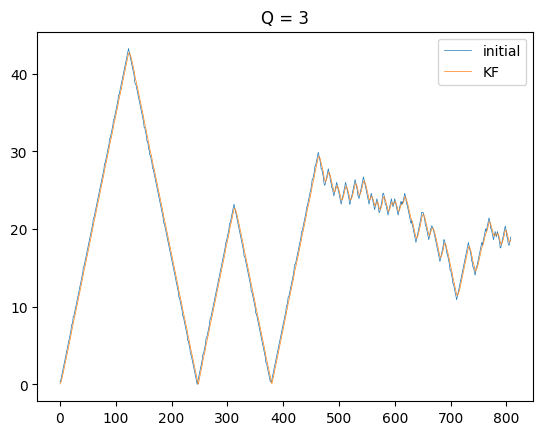

In [11]:
data_Q_3 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=3.txt')
# print(data_Q_3)
plt.figure(3)
len_3 = len(data_Q_3)
t3 = range(len_3)

data_Q_3_raw = data_Q_3[:,0]
data_Q_3_KF = data_Q_3[:,1]
plt.plot(t3, data_Q_3_raw,linewidth = 0.5,label = "initial")
plt.plot(t3,data_Q_3_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 3")

Q = 10; R = 16

Text(0.5, 1.0, 'Q = 10')

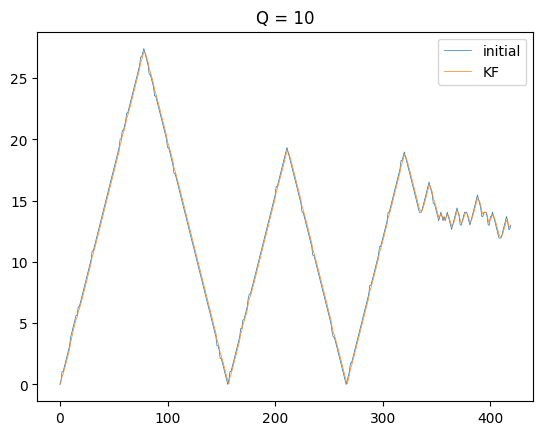

In [12]:
data_Q_10 = openreadtxt('d:\\桌面\\毕业设计\\diploma_project\\EE_control\\angle_data\\R=16\\datas_serial_Q=10.txt')
# print(data_Q_10)
plt.figure(4)
len_4 = len(data_Q_10)
t4 = range(len_4)

data_Q_10_raw = data_Q_10[:,0]
data_Q_10_KF = data_Q_10[:,1]
plt.plot(t4, data_Q_10_raw,linewidth = 0.5,label = "initial")
plt.plot(t4,data_Q_10_KF,linewidth = 0.5,label = "KF")
plt.legend()
plt.title("Q = 10")

Text(0.5, 1.0, 'Q = 3')

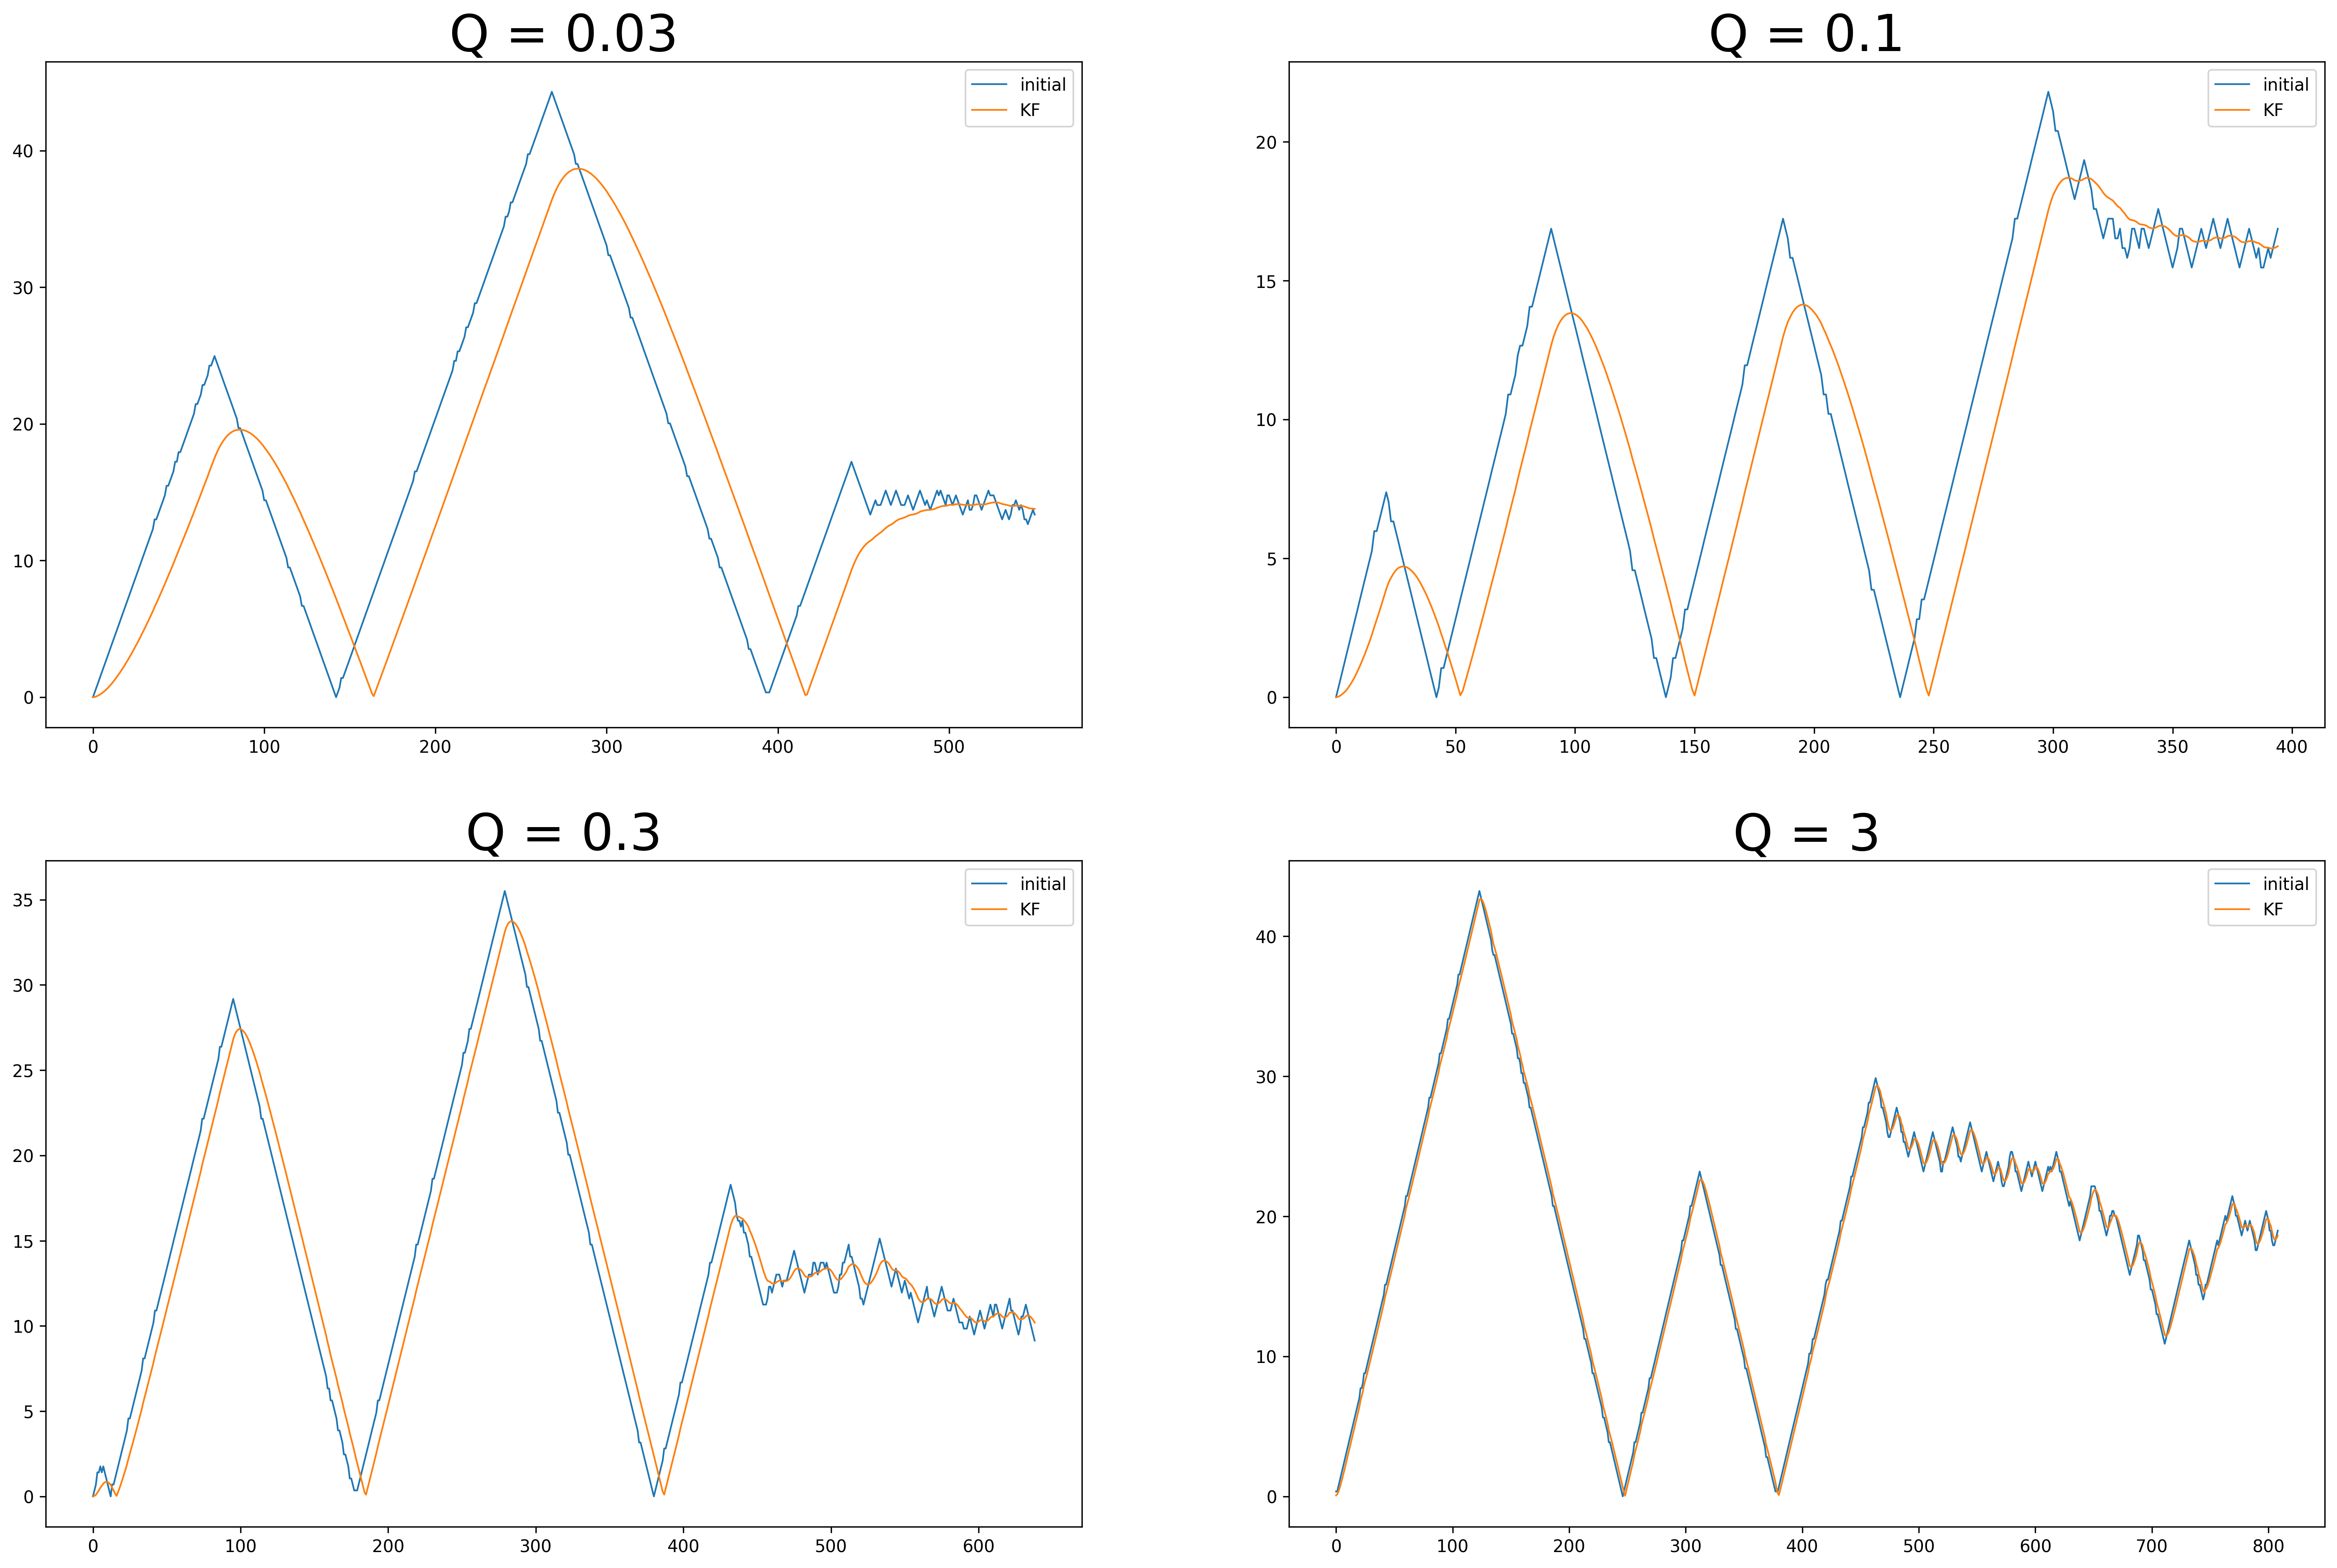

In [17]:
plt.figure(dpi=300, figsize=(24,24))
plt.subplot(321)
plt.plot(t1, data_Q_003_raw, linewidth = 1,label = "initial")
plt.plot(t1,data_Q_003_KF,linewidth = 1, label ="KF")
plt.legend()
plt.title("Q = 0.03",fontdict={'weight':'normal','size': 30})

plt.subplot(322)
plt.plot(t5, data_Q_01_raw, linewidth = 1,label = "initial" )
plt.plot(t5,data_Q_01_KF,linewidth = 1, label ="KF")
plt.legend()
plt.title("Q = 0.1",fontdict={'weight':'normal','size': 30})

plt.subplot(323)
plt.plot(t2, data_Q_03_raw,linewidth = 1,label = "initial")
plt.plot(t2,data_Q_03_KF,linewidth = 1, label ="KF")
plt.legend()
plt.title("Q = 0.3",fontdict={'weight':'normal','size': 30})

plt.subplot(324)
plt.plot(t3, data_Q_3_raw,linewidth = 1,label = "initial")
plt.plot(t3,data_Q_3_KF,linewidth = 1,label = "KF")
plt.legend()
plt.title("Q = 3",fontdict={'weight':'normal','size': 30})

# plt.subplot(325)
# plt.plot(t4, data_Q_10_raw,linewidth = 0.5,label = "initial")
# plt.plot(t4,data_Q_10_KF,linewidth = 0.5,label = "KF")
# plt.legend()
# plt.title("Q = 10")

 从上述结果可以看出，R一定时，Q越小滤波结果越相信预测结果，也就是和实际相差越大，起到了一定的抗干扰滤波作用；当Q大到一定程度时效果极具下降；
具体将卡尔曼滤波调参可也看这篇文章[kft调参](https://zhuanlan.zhihu.com/p/37750839)
"Q值为过程噪声，越小系统越容易收敛，我们对模型预测的值信任度越高；但是太小则容易发散，如果Q为零，那么我们只相信预测值；Q值越大我们对于预测的信任度就越低，而对测量值的信任度就变高；如果Q值无穷大，那么我们只信任测量值；R值为测量噪声，太小太大都不一定合适。R太大，卡尔曼滤波响应会变慢，因为它对新测量的值的信任度降低；越小系统收敛越快，但过小则容易出现震荡；测试时可以保持陀螺仪不动，记录一段时间内陀螺仪的输出数据，这个数据近似正态分布，按3σ原则，取正态分布的(3σ)^2作为R的初始化值。测试时可以先将Q从小往大调整，将R从大往小调整；先固定一个值去调整另外一个值，看收敛速度与波形输出。"

经过第二次机械结构迭代，结构稍微稳定一点了，但是还是存在一些问题，暂时在这个基础上看一下测试的结果
encoder_0 手指roll关节
encoder_1 前后伸缩关节
encoder_2 小臂偏转关节
encoder_3 pitch关节
encoder_4 yaw关节

为了说明滤波的必要性，需要明确以下两点：
1. 噪声主要来自哪里？
   1. 编码器自身的抖动，ABZ相可以忽略不计，模拟量必须处理
   2. 操作者自身的抖动，该抖动主要表现在动作幅度较小时，静止不动时尤为明显，一些需要保持手臂稳定的动作，如刺穿等手术时，这个滤波就需要处理了
   3. 经过对照实现，可以明显的看出，ABZ相编码器由于精度很高，自己的噪声和抖动非常的小，而模拟量编码器抖动则较为明显，需要使用滤波算法消除抖动；
2. 怎么体现滤波的作用
   1. 虽然没有明显的抖动，但是还是可以看得出明显的卡顿，用滤波可以消除这种阶跃类型的波形
   2. 对于明显的抖动，可以看得出，滤波也是起到了较为好的消除抖动的效果

3. 滤波带来的问题
   这个之前也说了，滤波的效果越好，抗干扰能力越强，同时就回带来与真实值偏差较大的问题，从下面有无滤波对比的图像就可以看出，有滤波处理的信号变得更加平滑，于此同时与真实值产生了一定的偏差，这一点在波峰和波谷上表现最为明显，滤波处理后的信号使得执行端无法完全达到预期的结果，以下提出两种解决方案：
   1. 自适应卡尔曼滤波，根据不同的情况能否调节不同的Q，R值呢？：比如小范围的抖动我直接效果较好的滤波器，而操作者提供的大幅度角度变化，我使用效果较弱的滤波器；因此Q,R应该是随前后两次角度变化幅度确定的？这里又可以说一大堆了；
   2. 0-1式卡尔曼滤波，就是判断是抖动，还是运动，从而决定使用哪种程度的滤波器，这在原理上和方案一一致，只不过Q，R的选择更为简单


对于模拟量绝对值编码器，由于它存在一个0-360的突变，如何解决这个问题呢？
* 方案一：检测到突变后，直接修改滤波器中_x的值
* 方案二：检测到突变后，把角度变成可以超过360的角度，经过滤波处理后，再减去360（这个情况比较复杂）



### 看看有哪些抖动
1. 先画一个没有任何处理的纯图像

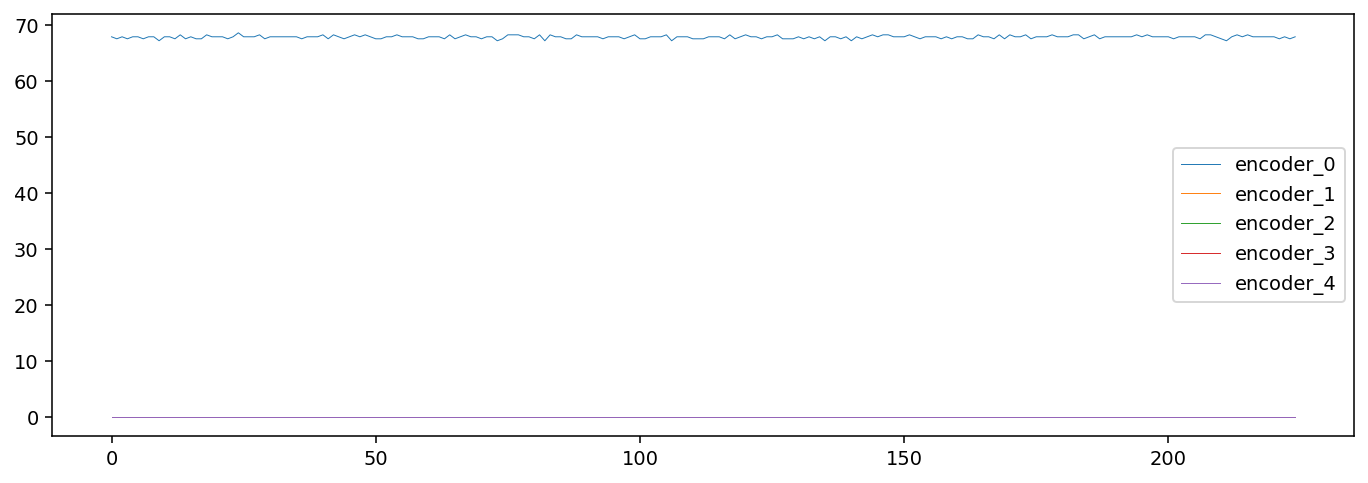

In [42]:
file_init = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/纯静止.txt'
plot_the_curve(file_init,140,(12,4))

No handles with labels found to put in legend.


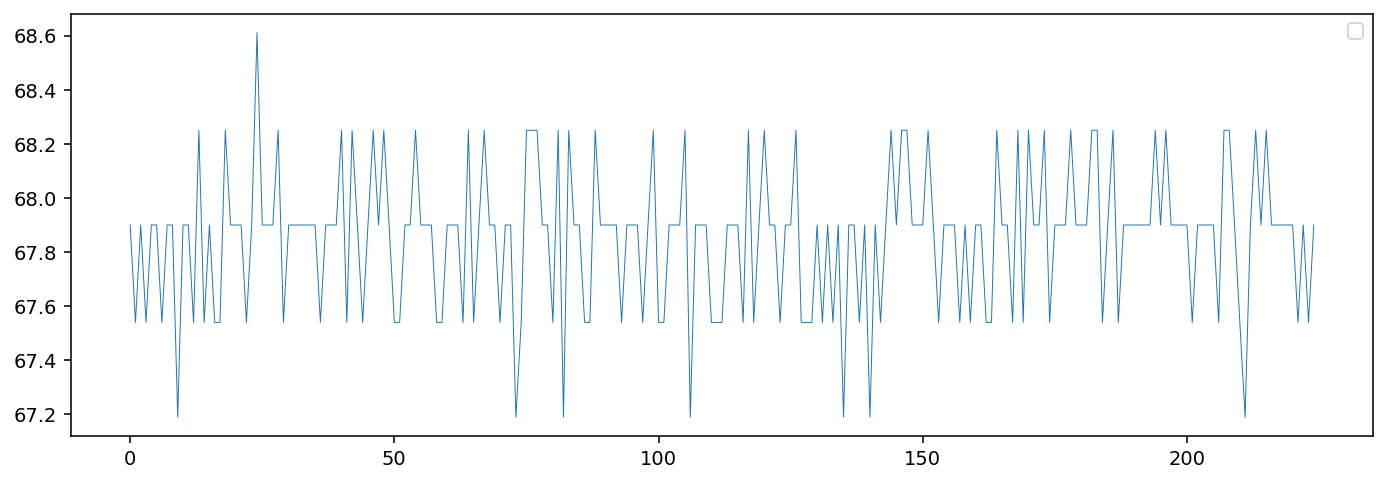

In [44]:
data_file_init = np.genfromtxt(file_init)
data_file_init_encoder0 = data_file_init[:,0]
plot_the_array(data_file_init_encoder0,140,(12,4))

上图应证了之前的说法，模拟量编码器很烂
2. 画手部保持静止时的图像，就是后面那些了，多少还是看得出来有些抖动的

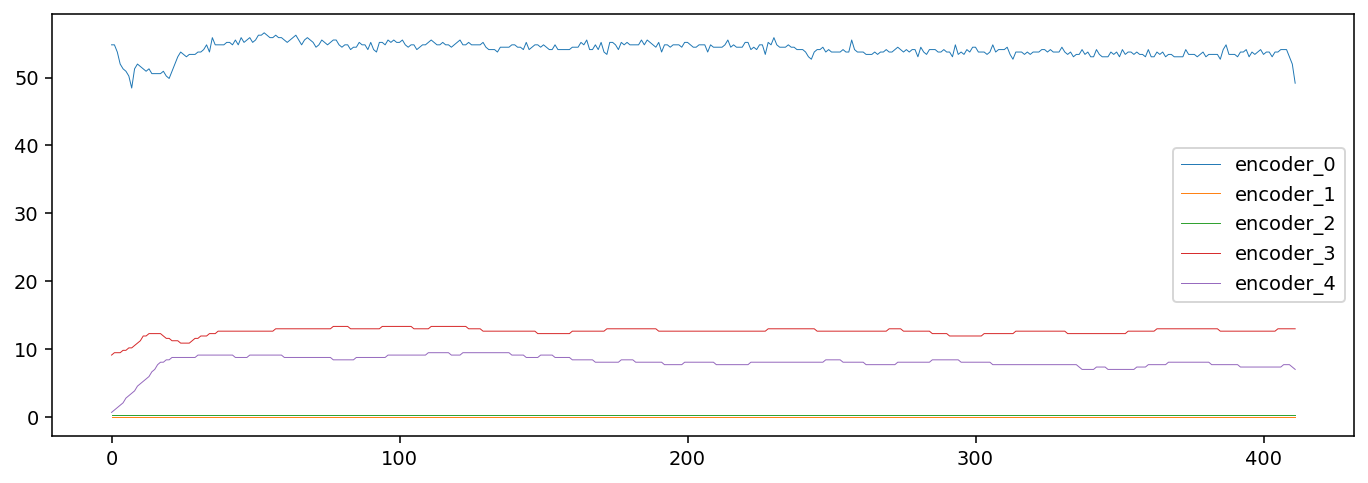

In [46]:
file_init_shake = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/静止抖动.txt'
plot_the_curve(file_init_shake,140,(12,4))

No handles with labels found to put in legend.


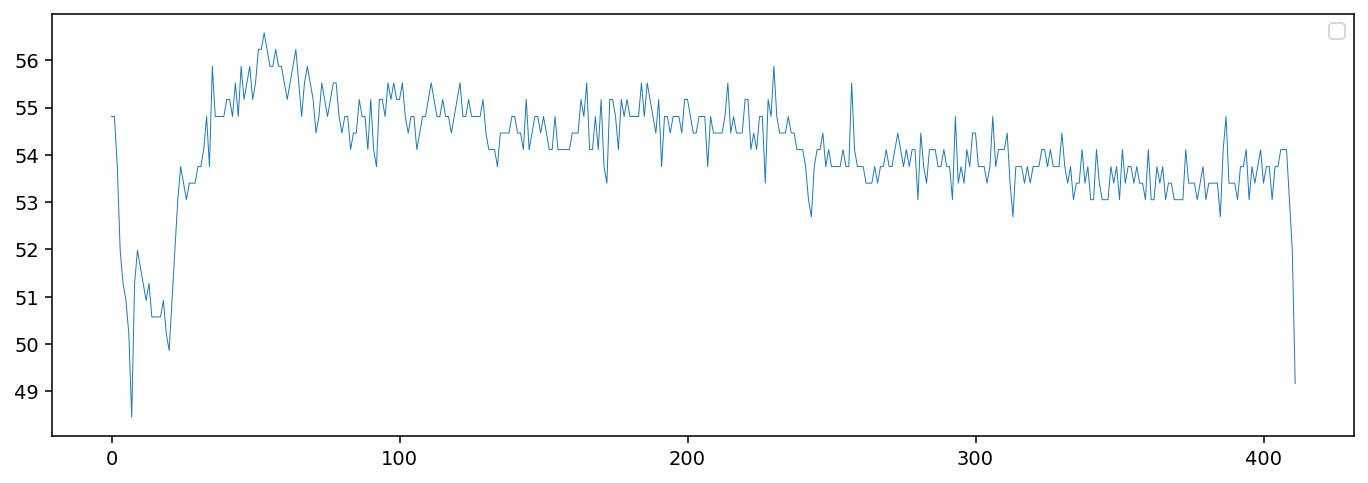

In [49]:
data_file_init_shake = np.genfromtxt(file_init_shake)
data_file_init_shake_encoder0 = data_file_init_shake[:,0]
plot_the_array(data_file_init_shake_encoder0,140,(12,4))

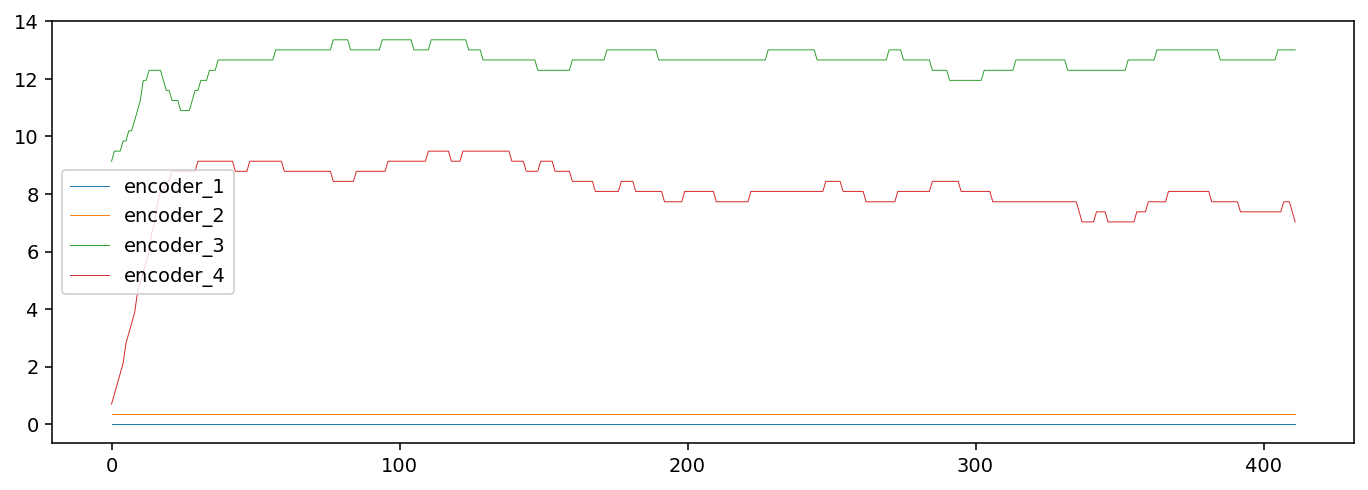

In [48]:
plot_the_curve_without0(file_init_shake,140,(12,4))

### KF效果对照
以下绘制了几组常见动作在有无滤波条件下的结果：

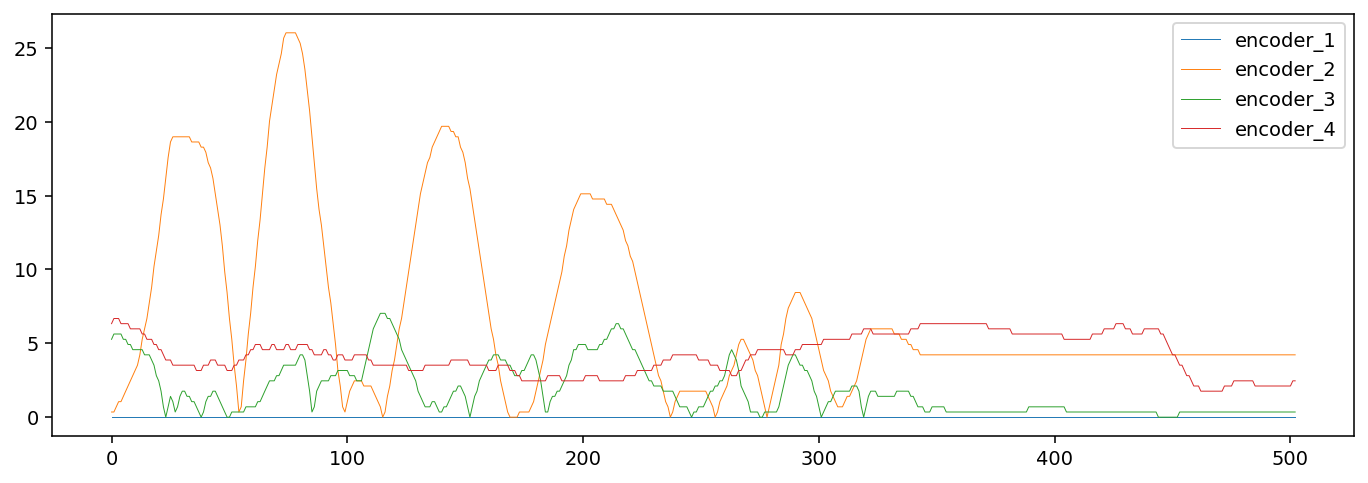

In [11]:
file_smallArm_1_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/小臂定位.txt'
plot_the_curve_without0(file_smallArm_1_0KF,140,(12,4))

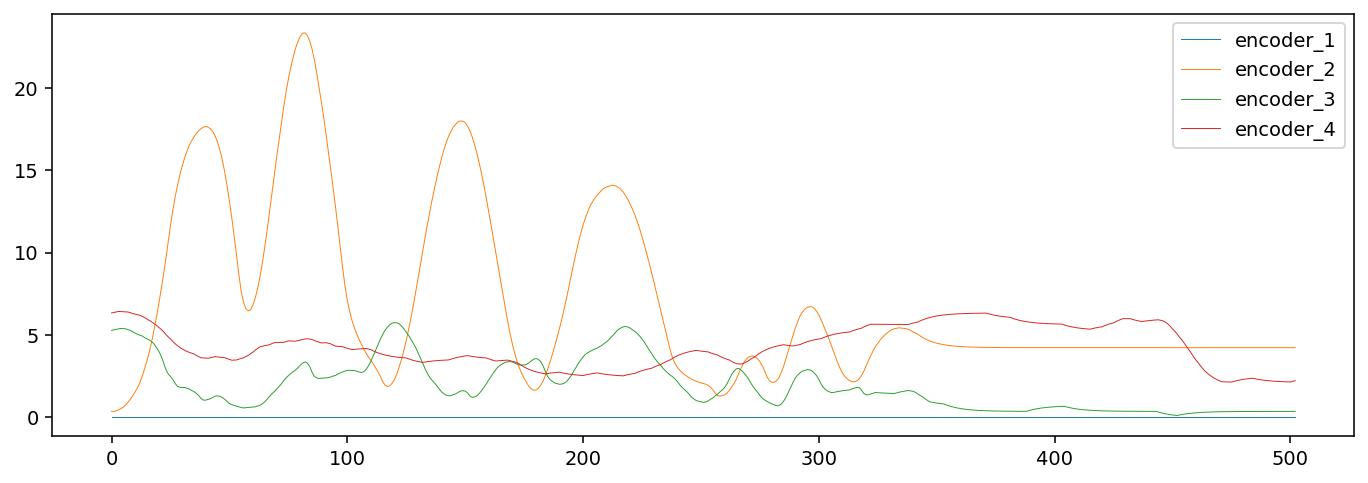

In [21]:
data_file_smallArm_1_0KF = np.genfromtxt(file_smallArm_1_0KF)
file_smallArm_1_1KF = after_KF(data_file_smallArm_1_0KF, Q= 0.3, R= 16)
plot_the_data(file_smallArm_1_1KF,140,(12,4))


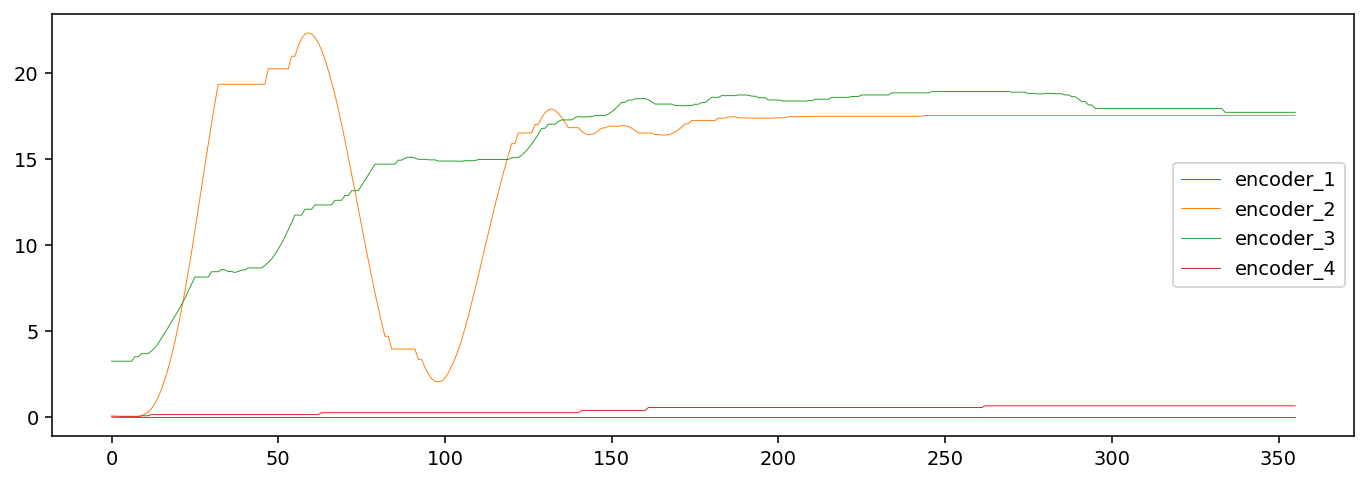

In [5]:
file_smallArm_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/小臂定位-1.txt'
plot_the_curve_without0(file_smallArm_1, 140,(12,4))

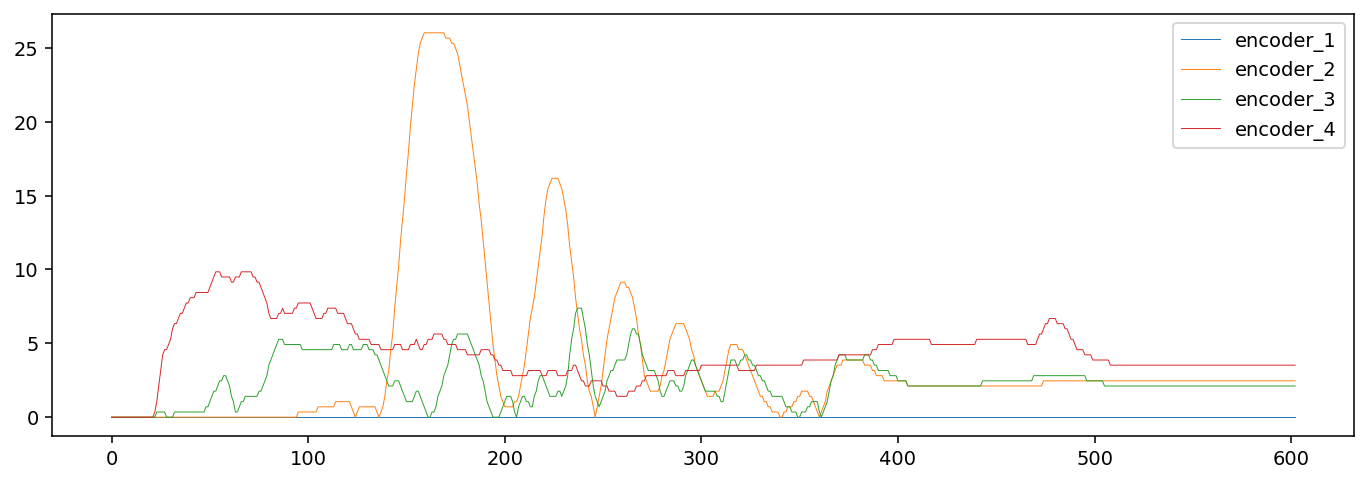

In [24]:
file_smallArm_2_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/小臂定位-2.txt'
plot_the_curve_without0(file_smallArm_2_0KF,140,(12,4))

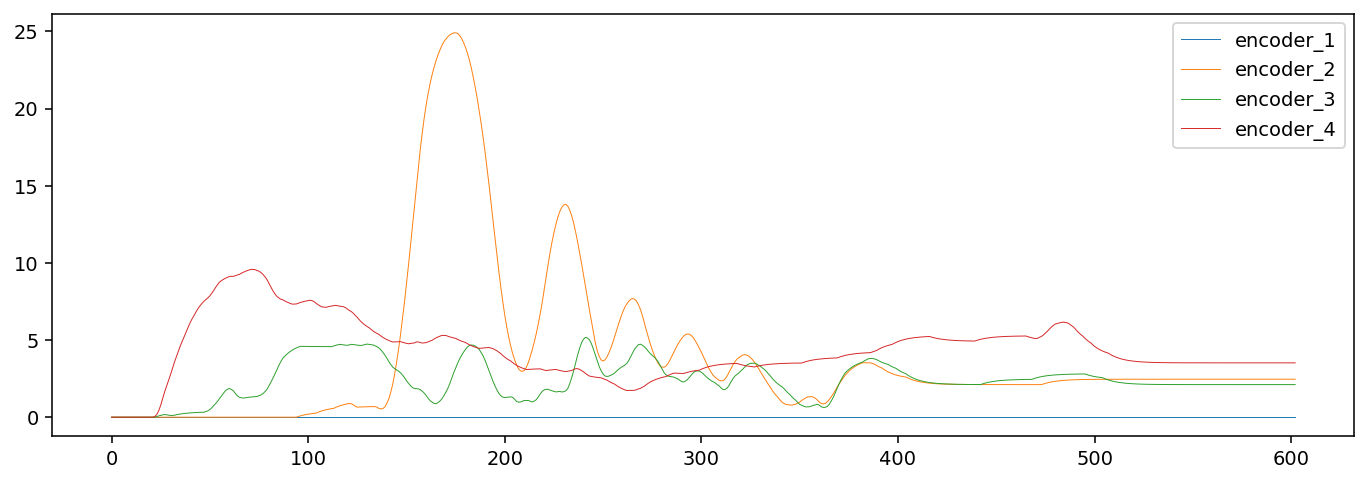

In [25]:
data_file_smallArm_2_0KF = np.genfromtxt(file_smallArm_2_0KF)
data_file_smallArm_2_1KF = after_KF(data_file_smallArm_2_0KF, Q= 0.3, R= 16)
plot_the_data(data_file_smallArm_2_1KF,140,(12,4))

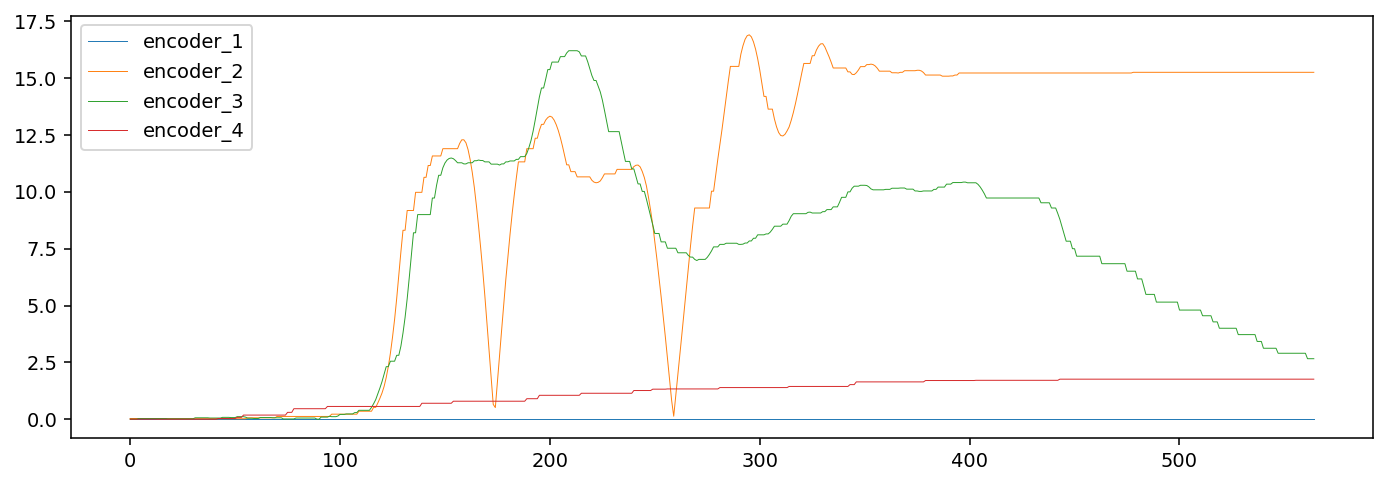

In [11]:
file_smallArm_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/小臂定位-2.txt'
plot_the_curve_without0(file_smallArm_2, 140,(12,4))

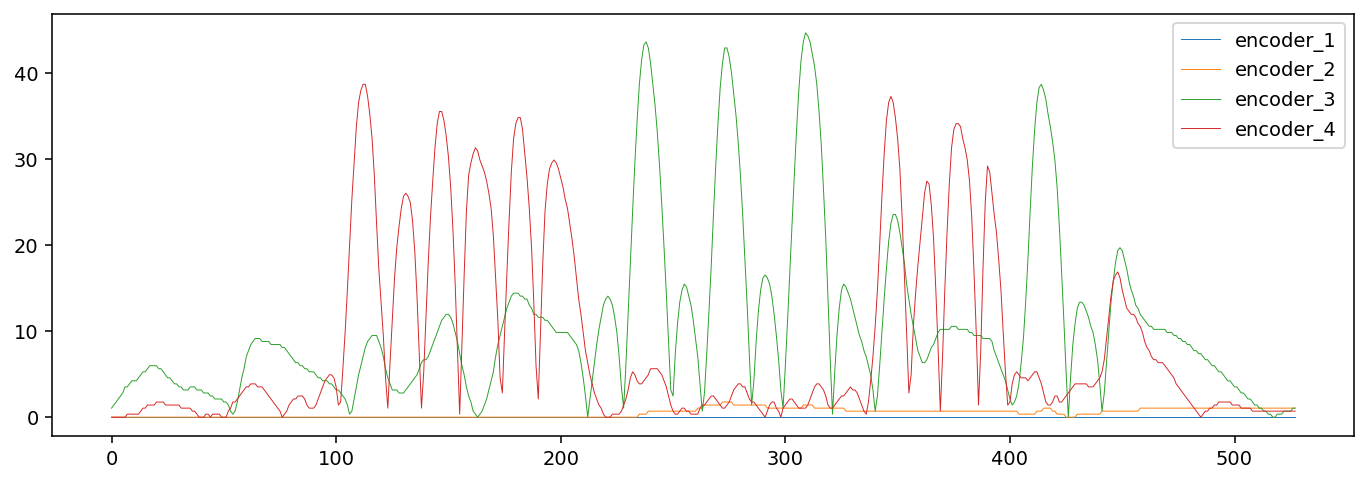

In [3]:
file_cutting_1_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/上下左右切割.txt'
plot_the_curve_without0(file_cutting_1_0KF,140,(12,4))

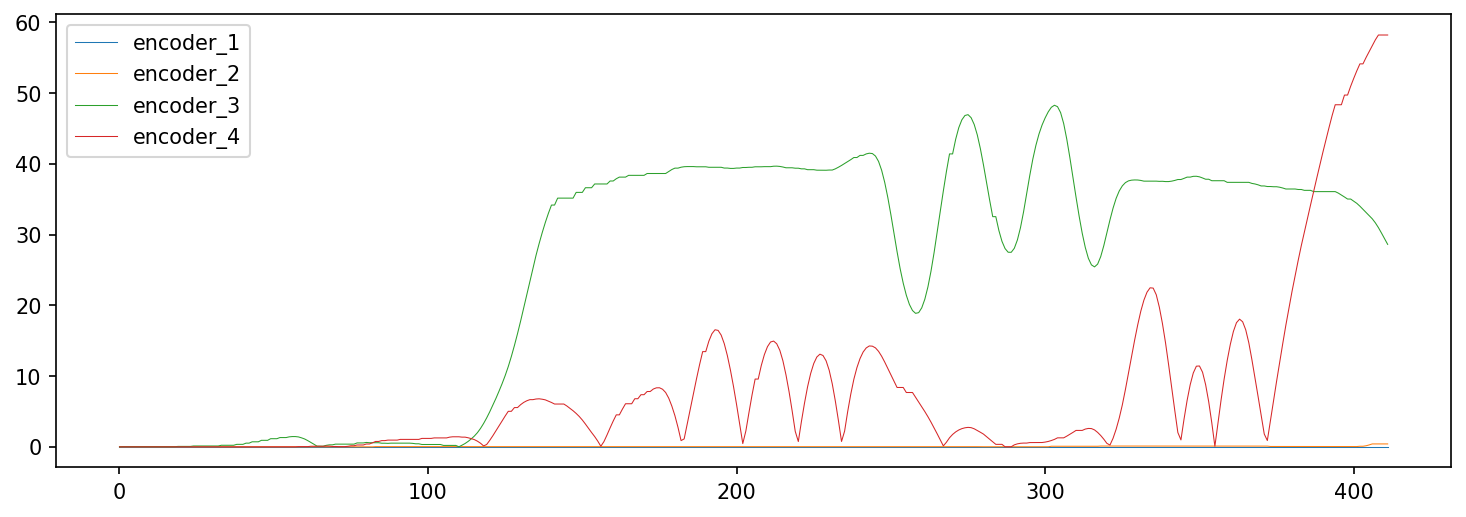

In [12]:
file_cutting_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/上下左右切割-1.txt'
plot_the_curve_without0(file_cutting_1, 150, (12,4))

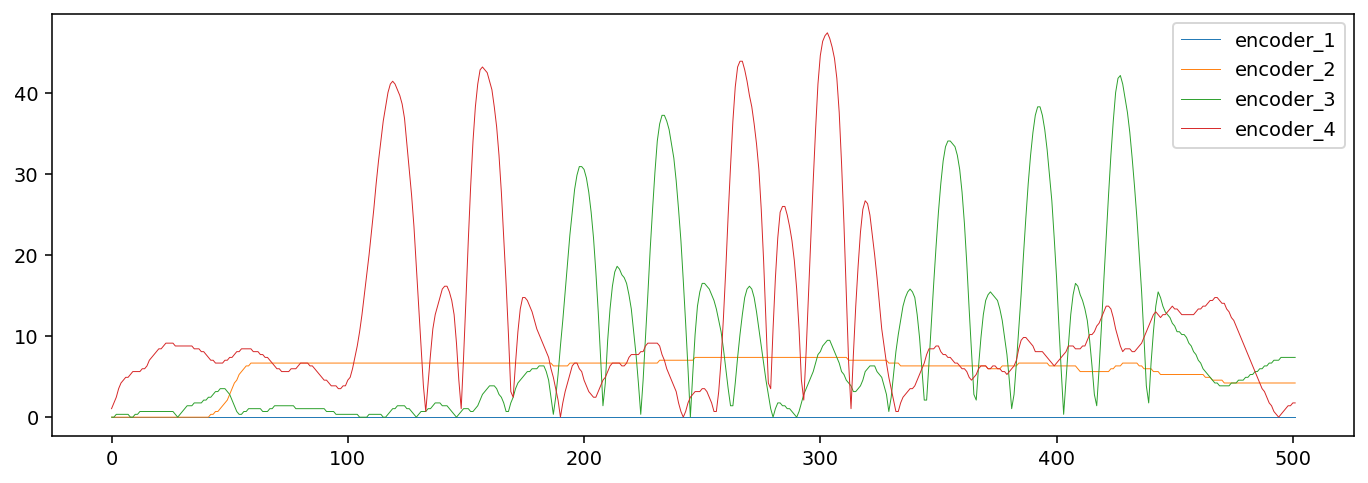

In [5]:
file_cutting_2_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/上下左右切割-2.txt'
plot_the_curve_without0(file_cutting_2_0KF,140,(12,4))

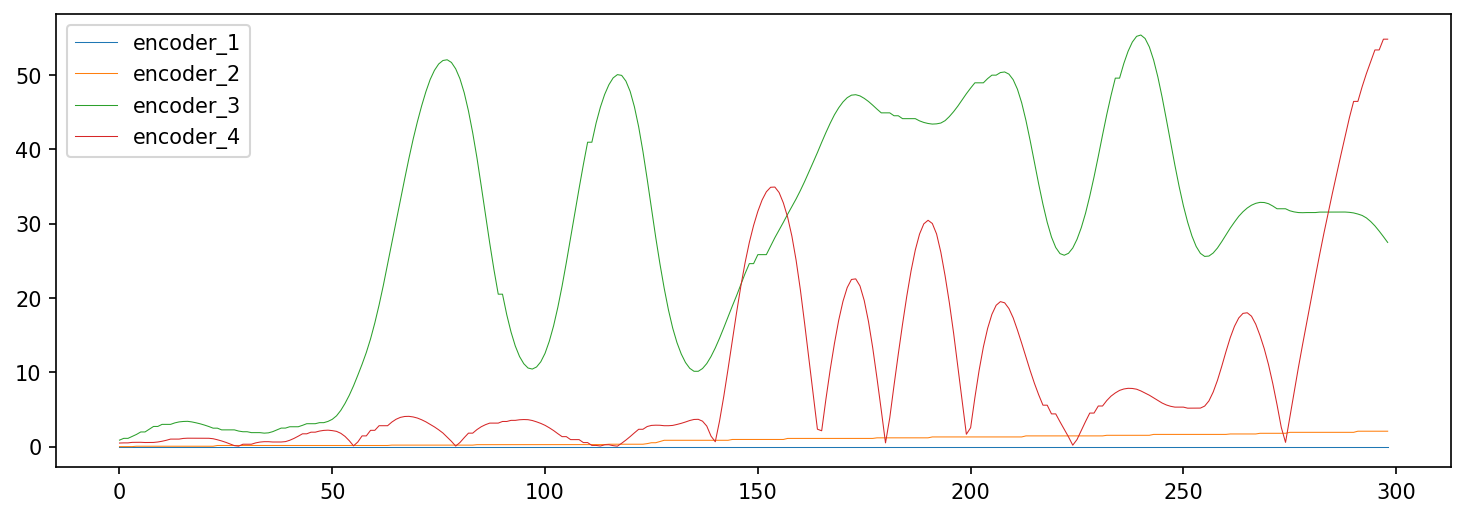

In [13]:
file_cutting_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/上下左右切割-2.txt'
plot_the_curve_without0(file_cutting_2, 150, (12,4))

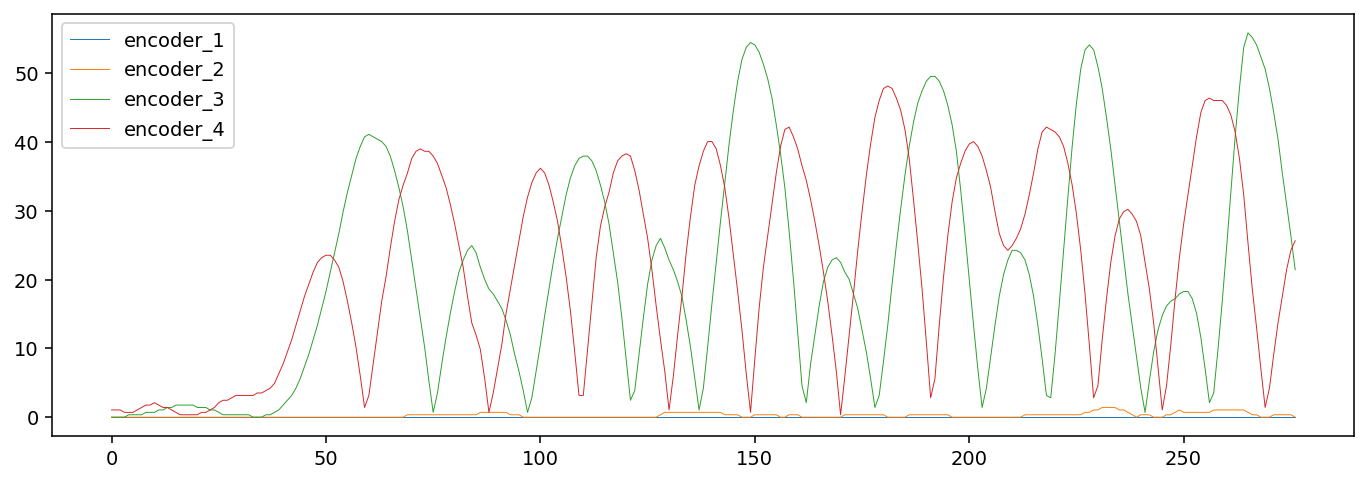

In [9]:
file_circling_1_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/circling.txt'
plot_the_curve_without0(file_circling_1_0KF,140,(12,4))

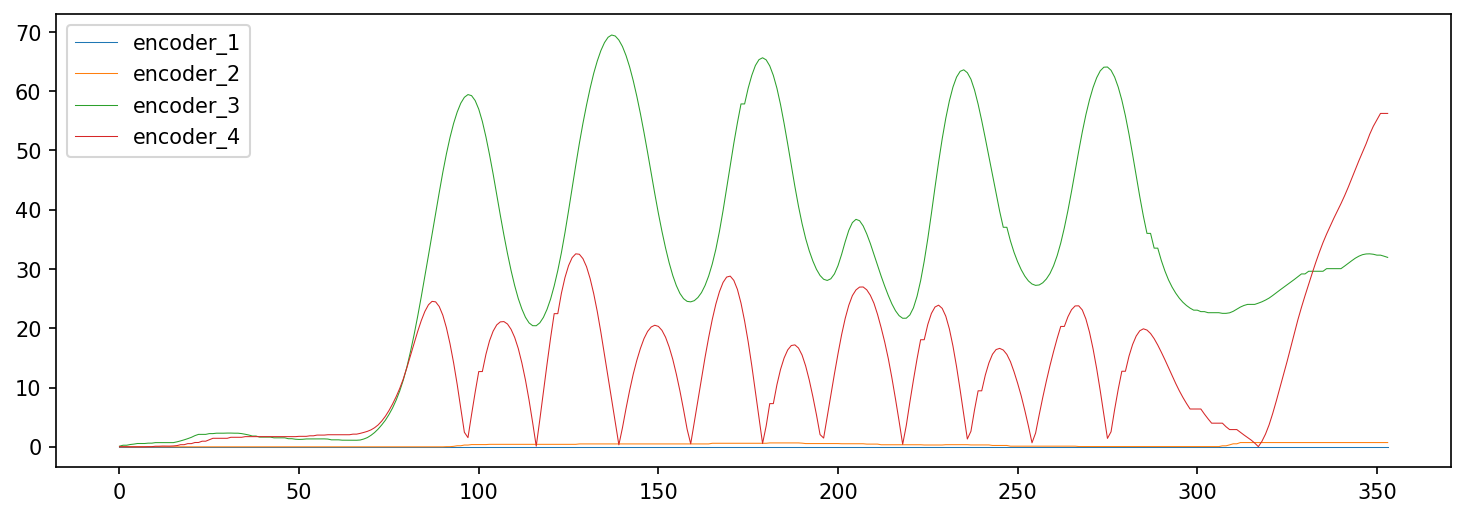

In [14]:
file_circling_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/转圈圈-1.txt'
plot_the_curve_without0(file_circling_1, 150, (12,4))

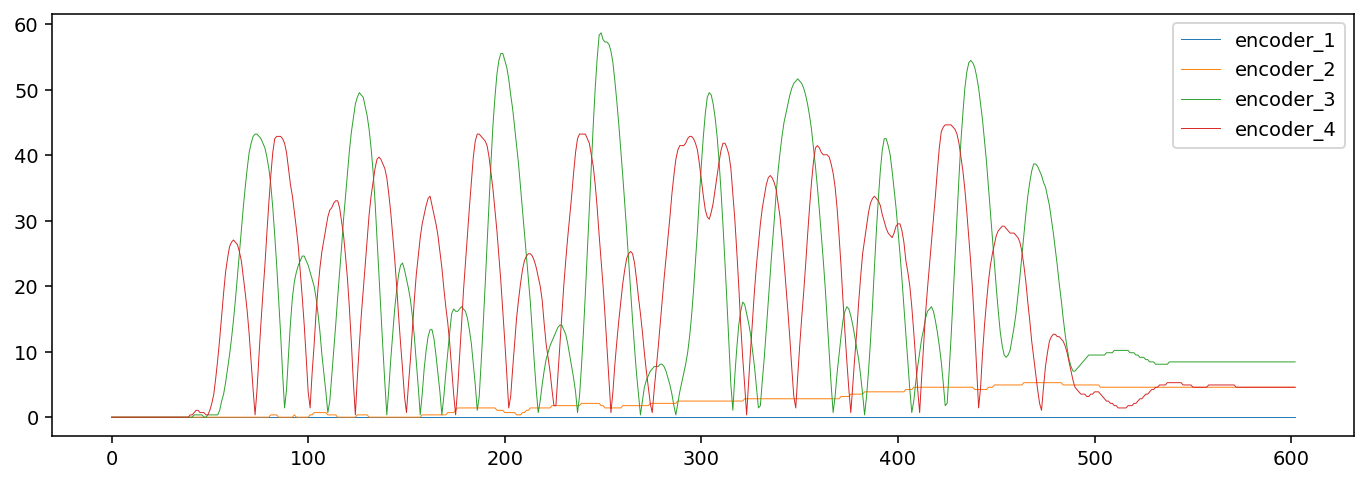

In [10]:
file_circling_2_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/circling-2.txt'
plot_the_curve_without0(file_circling_2_0KF,140,(12,4))

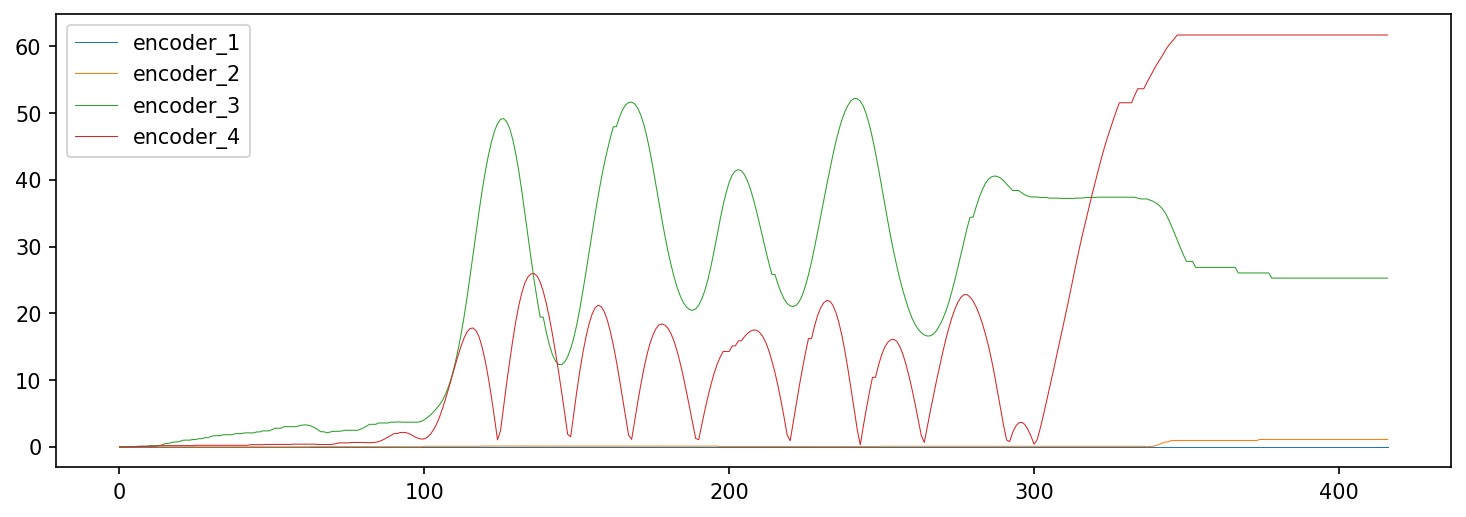

In [7]:
file_circling_2 = file_circling_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/转圈圈-2.txt'
plot_the_curve_without0(file_circling_2, 150, (12,4))

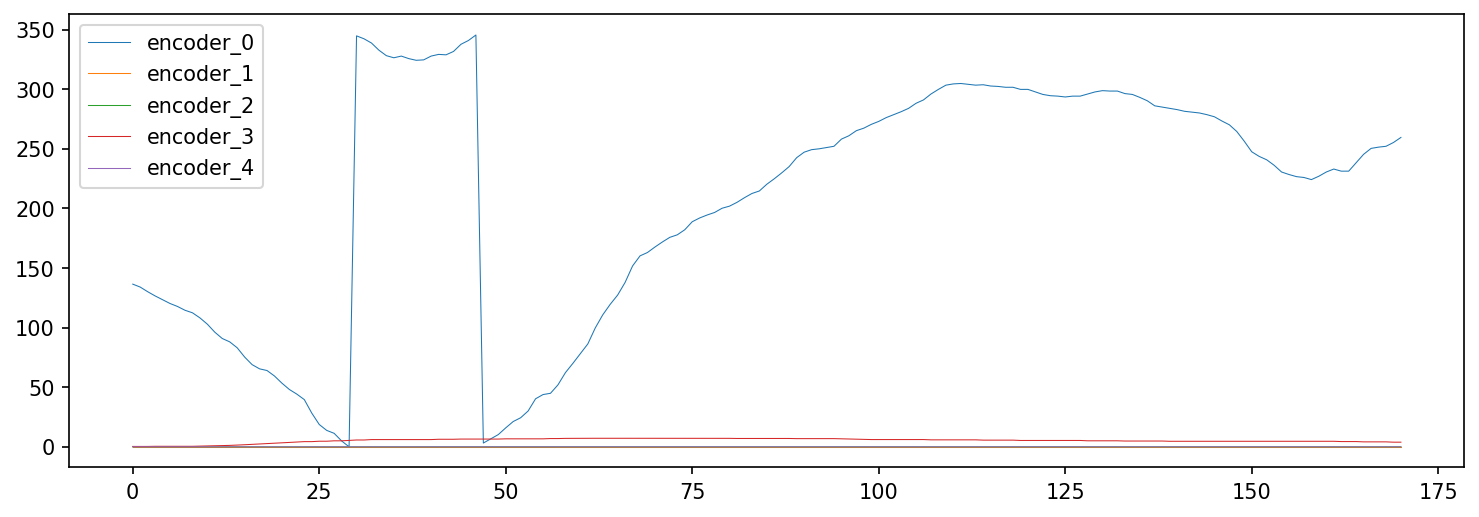

In [29]:
file_rolling_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/钻孔.txt'
plot_the_curve(file_rolling_1, 150, (12,4))

No handles with labels found to put in legend.


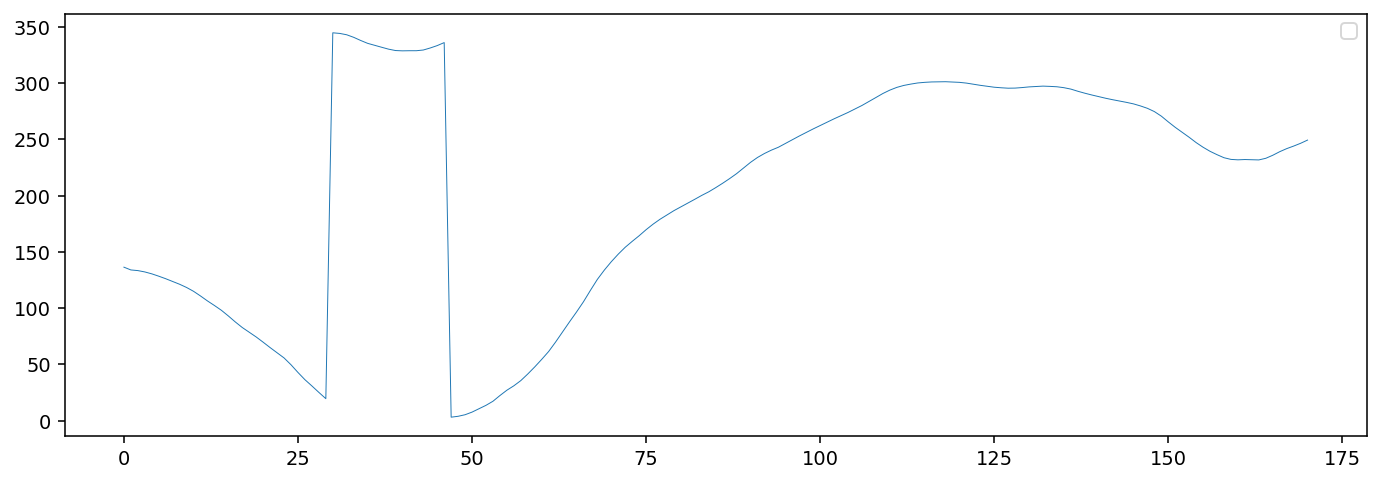

In [39]:
data_file_rolling_1 = np.genfromtxt(file_rolling_1)
data_file_rolling_1_encoder0 = data_file_rolling_1[:,0]
data_file_rolling_1_encoder0_1KF = after_KF_encoder0(data_file_rolling_1_encoder0, Q= 1, R= 16)
plot_the_array(data_file_rolling_1_encoder0_1KF,140, (12,4))

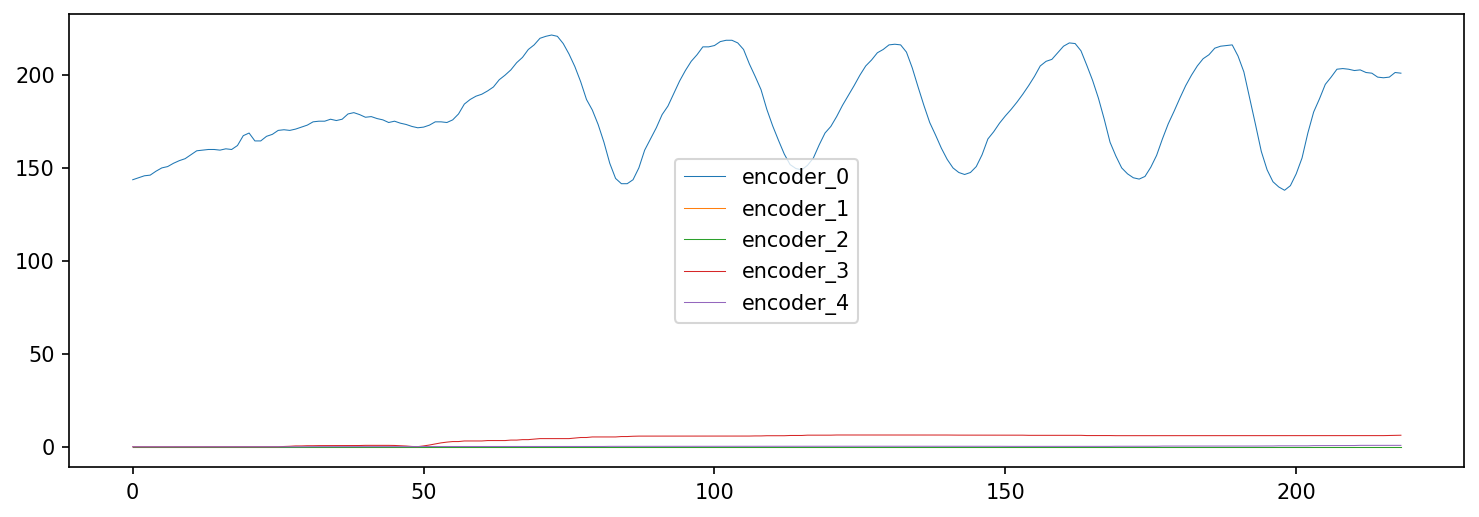

In [ ]:
file_rolling = '/Users/lilinlin/Desktop/毕设/data_analyze/钻孔-2.txt'
plot_the_curve(file_rolling, 150, (12,4))

经过测试，发现存在以下问题：
1. pitch编码器的变化会直接同步到yaw编码器上？？？ 这是什么情况，目前推测是接线的问题，重新检查一遍接线；

以上问题在3.30得到解决，出现该bug的原因是多个编码器复用一个卡尔曼滤波器
现在的问题是，我好像也没看到什么明显的抖动，现在来分析一下医生手术时手会抖吗

不加卡尔曼时观察保持手部静止的波形图-1

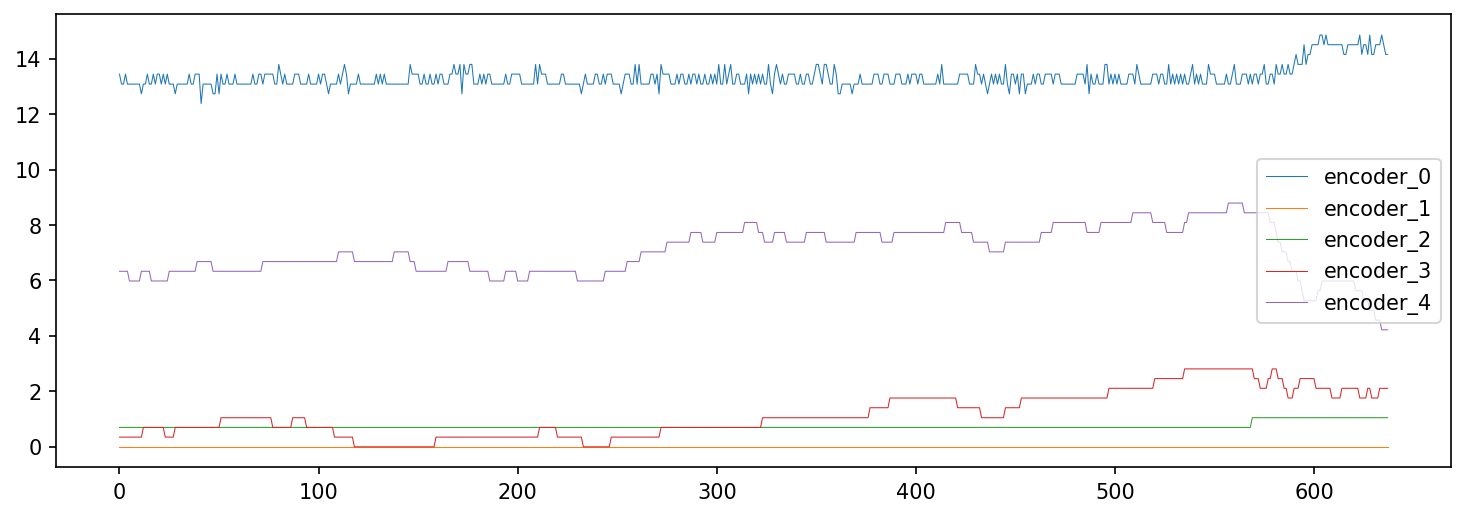

In [ ]:
file_shaking_noKF = '/Users/lilinlin/Desktop/毕设/data_analyze/没有卡尔曼滤波的抖动.txt'
plot_the_curve(file_shaking_noKF, 150, (12,4))

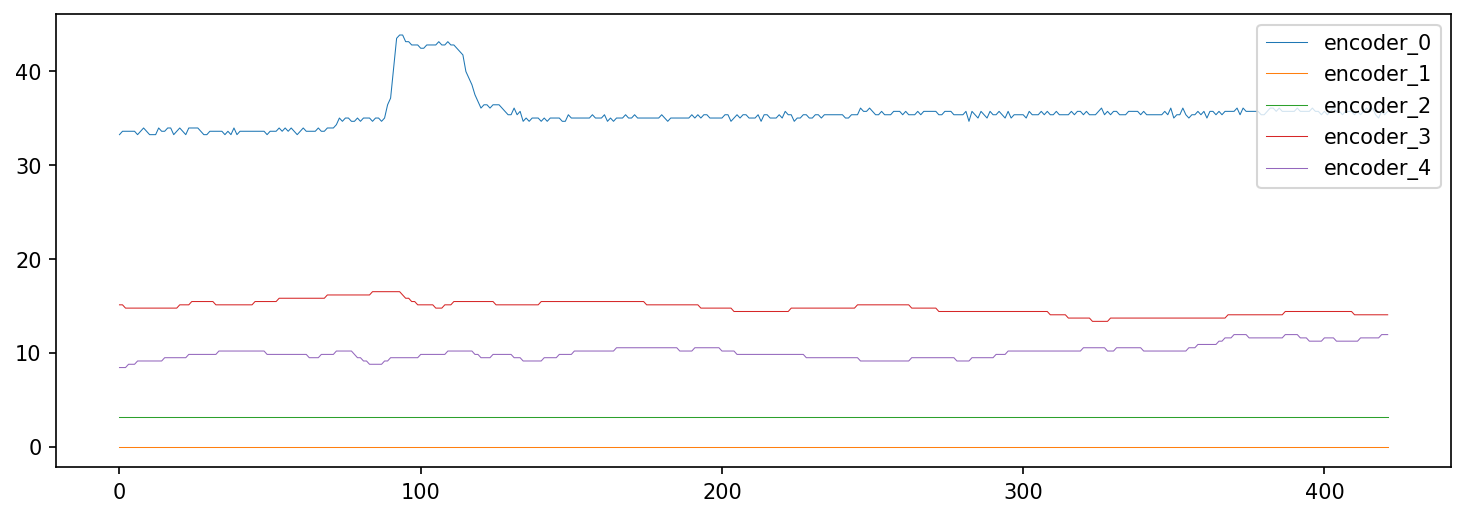

In [ ]:
file_shaking_noKF_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/没有卡尔曼的抖动.txt'
plot_the_curve(file_shaking_noKF_2, 150, (12,4))

以下为添加卡尔曼滤波后抖动波形图

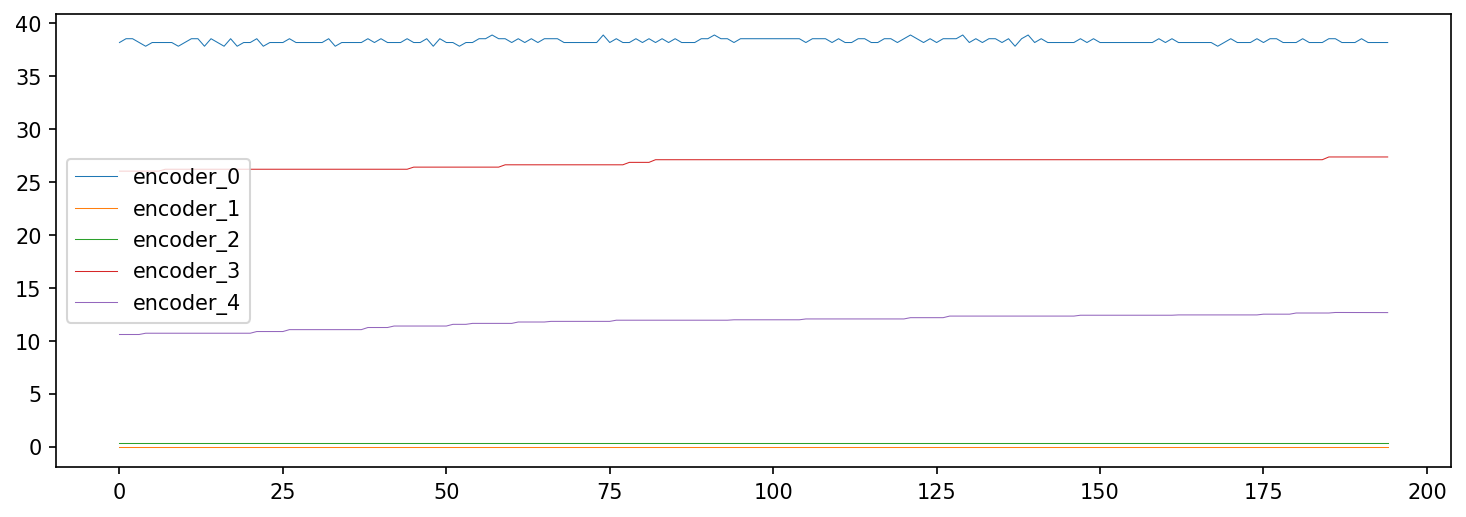

In [ ]:
file_shaking_1 = '/Users/lilinlin/Desktop/毕设/data_analyze/不自主抖动.txt'
plot_the_curve(file_shaking_1, 150, (12,4))

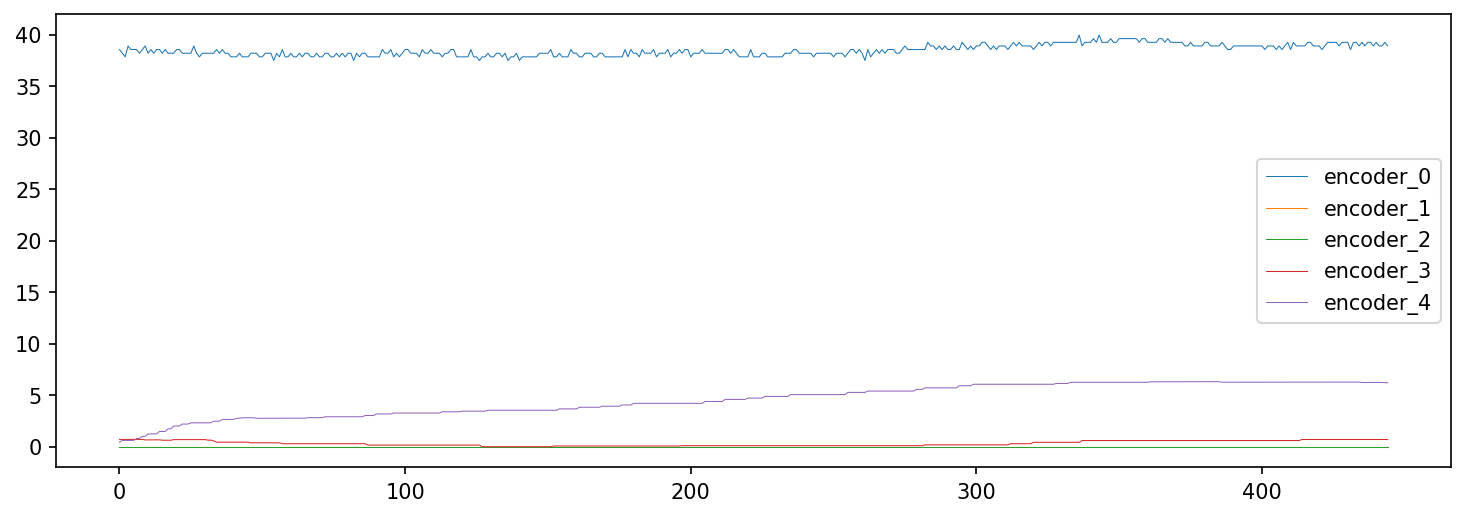

In [ ]:
file_shaking_2 = '/Users/lilinlin/Desktop/毕设/data_analyze/不自主抖动-2.txt'
plot_the_curve(file_shaking_2, 150, (12,4))

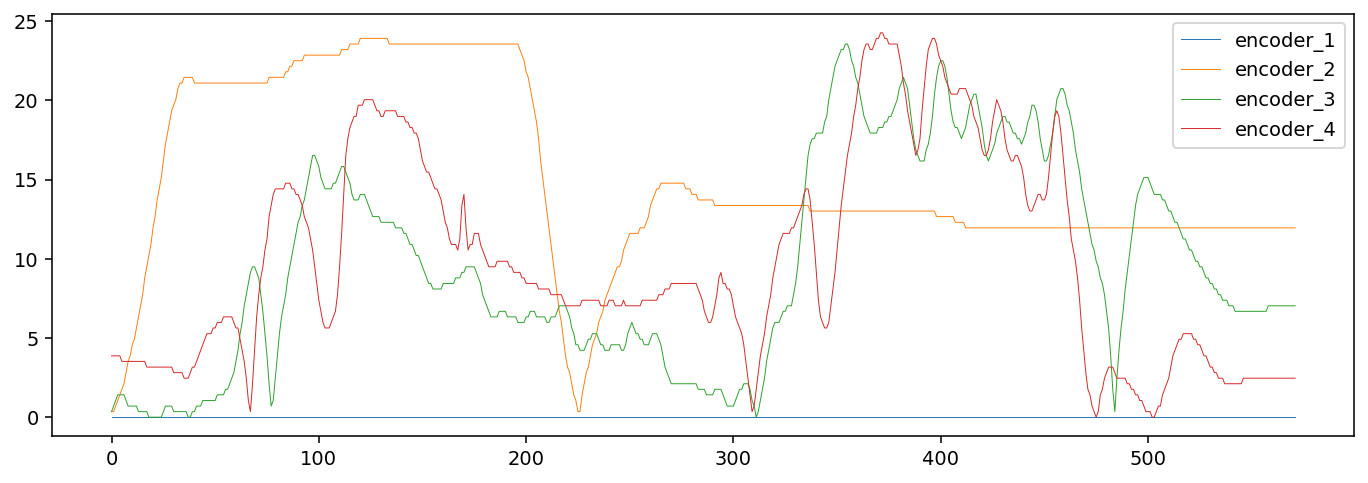

In [ ]:
file_A2B_2_0KF = '/Users/lilinlin/Desktop/毕设/data_withoutKF/4-10/fromA2B.txt'
plot_the_curve_without0(file_A2B_2_0KF,140,(12,4))

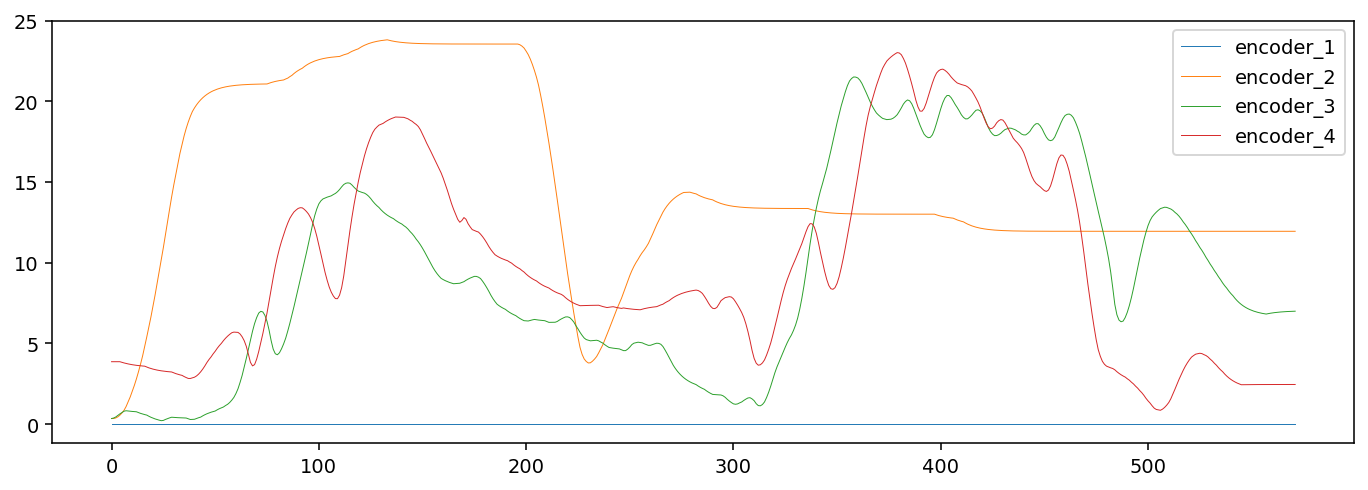

In [ ]:
data_file_A2B_2_0KF = np.genfromtxt(file_A2B_2_0KF)
data_file_A2B_2_1KF = after_KF(data_file_A2B_2_0KF, Q= 0.3, R= 16)
plot_the_data(data_file_A2B_2_1KF,140,(12,4))